In [37]:
library(dplyr)
library(rafalib)

In [1]:
dat <- read.csv("../dagdata/inst/extdata/mice_pheno.csv")

In [2]:
head(dat)

,Sex,Diet,Bodyweight
,<chr>,<chr>,<dbl>
1,F,hf,31.94
2,F,hf,32.48
3,F,hf,22.82
4,F,hf,19.92
5,F,hf,32.22
6,F,hf,27.50


In [3]:
dat <- na.omit( dat )

In [9]:
mean(pnorm(dat$Bodyweight) <=1)

[1] 1

In [11]:
?pnorm

Normal {stats},R Documentation
"x, q",vector of quantiles.
p,vector of probabilities.
n,"number of observations. If length(n) > 1, the length is taken to be the number required."
mean,vector of means.
sd,vector of standard deviations.
"log, log.p","logical; if TRUE, probabilities p are given as log(p)."
lower.tail,"logical; if TRUE (default), probabilities are P[X ≤ x] otherwise, P[X > x]."


In [26]:
pnorm(1) - pnorm(-1)


[1] 0.6826895

In [27]:
pnorm(2) - pnorm(-2)

[1] 0.9544997

In [28]:
pnorm(3) - pnorm(-3)

[1] 0.9973002

In [30]:
head(dat)

,Sex,Diet,Bodyweight
,<chr>,<chr>,<dbl>
1,F,hf,31.94
2,F,hf,32.48
3,F,hf,22.82
4,F,hf,19.92
5,F,hf,32.22
6,F,hf,27.50


In [35]:
y <- filter(dat, Sex=="M" & Diet=="chow") %>% select(Bodyweight) %>% unlist

In [40]:
y_sd = popsd(y)

In [41]:
y_bar = mean(y)

In [42]:
mean(y <= y_bar+y_sd)

[1] 0.8520179

In [43]:
mean(y <= y_bar-y_sd)

[1] 0.1569507

In [44]:
mean(y <= y_bar+y_sd)-mean(y <= y_bar-y_sd) # 1 std 

[1] 0.6950673

In [45]:
mean(y <= y_bar+2*y_sd)-mean(y <= y_bar-2*y_sd)  # 2 std

[1] 0.9461883

In [46]:
mean(y <= y_bar+3*y_sd)-mean(y <= y_bar-3*y_sd)  # 3 std

[1] 0.9910314

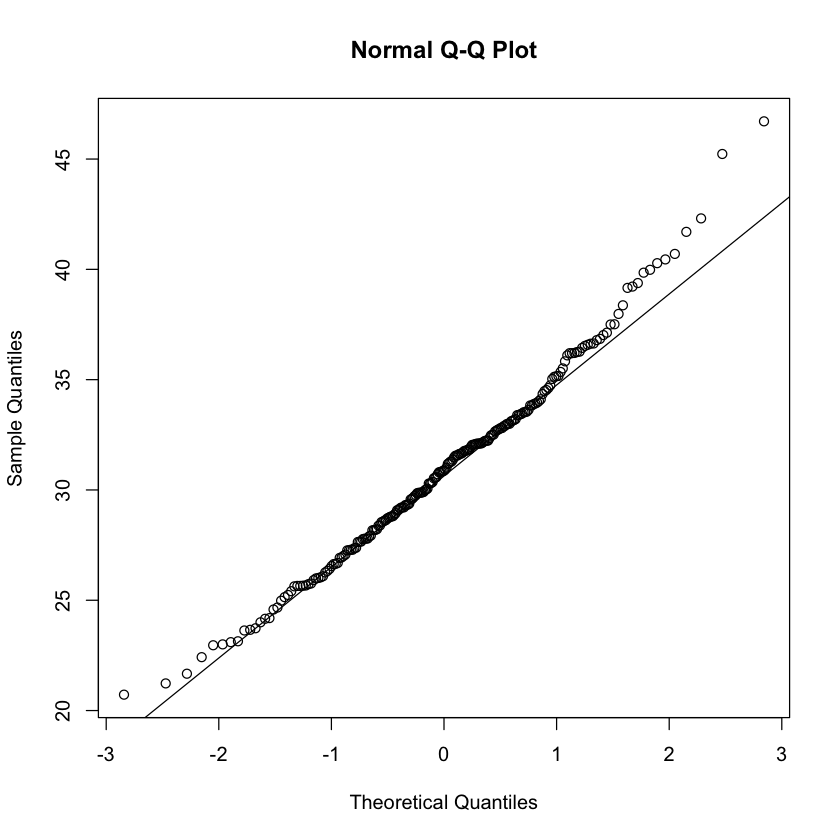

In [50]:
qqnorm(y)
qqline(y)
abline(0,1)

# 8

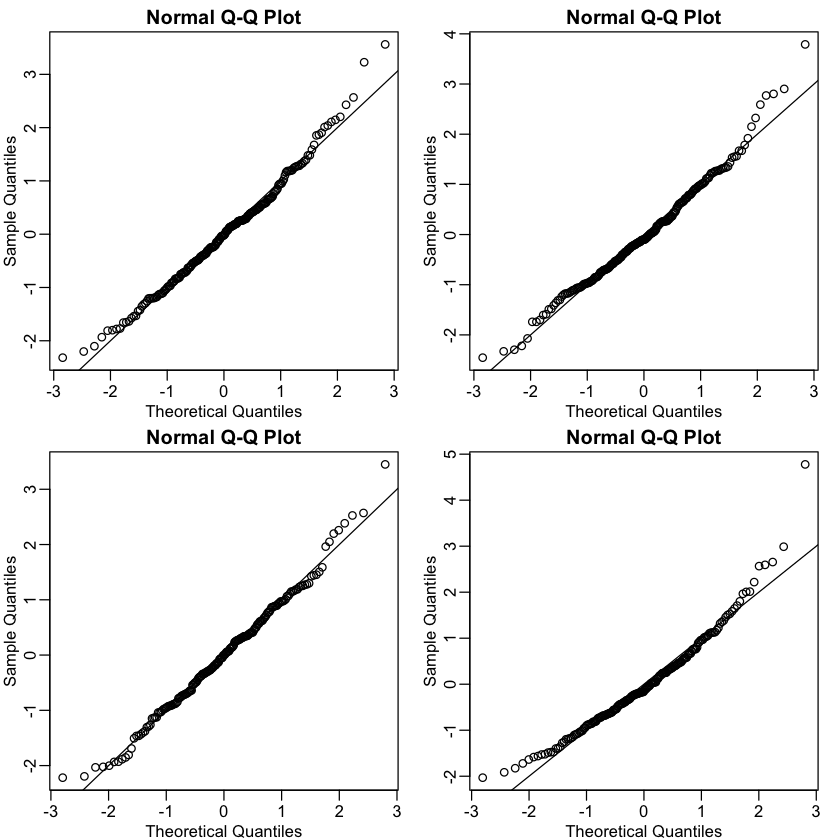

In [51]:
mypar(2,2)
y <- filter(dat, Sex=="M" & Diet=="chow") %>% select(Bodyweight) %>% unlist
z <- ( y - mean(y) ) / popsd(y)
qqnorm(z);abline(0,1)
y <- filter(dat, Sex=="F" & Diet=="chow") %>% select(Bodyweight) %>% unlist
z <- ( y - mean(y) ) / popsd(y)
qqnorm(z);abline(0,1)
y <- filter(dat, Sex=="M" & Diet=="hf") %>% select(Bodyweight) %>% unlist
z <- ( y - mean(y) ) / popsd(y)
qqnorm(z);abline(0,1)
y <- filter(dat, Sex=="F" & Diet=="hf") %>% select(Bodyweight) %>% unlist
z <- ( y - mean(y) ) / popsd(y)
qqnorm(z);abline(0,1)

# 9

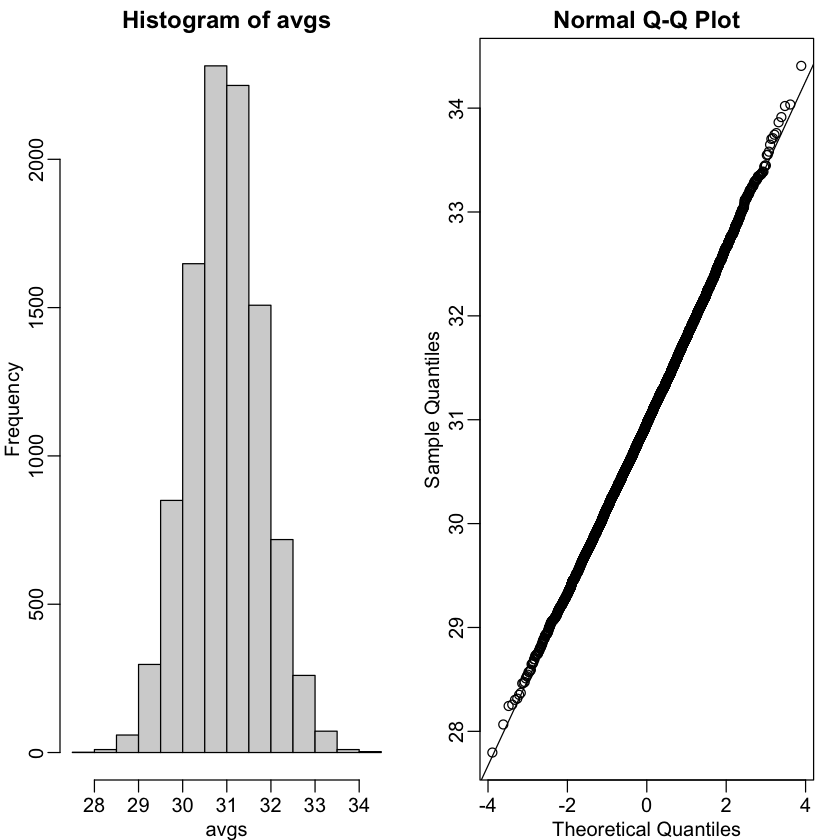

In [52]:
y <- filter(dat, Sex=="M" & Diet=="chow") %>% select(Bodyweight) %>% unlist
set.seed(1)
avgs <- replicate(10000, mean( sample(y, 25)))
mypar(1,2)
hist(avgs)
qqnorm(avgs)
qqline(avgs)

In [54]:
mean(avgs)

[1] 30.96856

In [56]:
popsd(avgs)

[1] 0.827082